In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline


In [2]:
df_original = pd.read_csv('home_data.csv.zip')

In [3]:
df = df_original.copy()

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.dtypes

id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
# target is the price
# some features will be 'bedrooms', 'bathrooms', 'sqft_living', floors' view, yr_renovated, zipcode, 'condition', sqft_basement'


In [9]:
df.shape

(21613, 21)

In [10]:
df = df.drop(['lat', 'long', 'sqft_living15', 'sqft_lot15','sqft_above','date','waterfront','yr_renovated' ,'view','sqft_basement'], axis = 1)

In [11]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'grade', 'yr_built', 'zipcode'],
      dtype='object')

In [12]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'grade', 'yr_built', 'zipcode'],
      dtype='object')

In [13]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,3.409430,7.656873,1971.005136,98077.939805
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.650743,1.175459,29.373411,53.505026
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,1.000000,1900.000000,98001.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,3.000000,7.000000,1951.000000,98033.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,7.000000,1975.000000,98065.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,4.000000,8.000000,1997.000000,98118.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,2015.000000,98199.000000


In [14]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [15]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
0,7129300520,221900,3,1.00,1180,5650,1.0,3,7,1955,98178
1,6414100192,538000,3,2.25,2570,7242,2.0,3,7,1951,98125
2,5631500400,180000,2,1.00,770,10000,1.0,3,6,1933,98028
3,2487200875,604000,4,3.00,1960,5000,1.0,5,7,1965,98136
4,1954400510,510000,3,2.00,1680,8080,1.0,3,8,1987,98074


In [16]:
df['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [17]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'grade', 'yr_built', 'zipcode'],
      dtype='object')

In [18]:
df['sqft_living'] = np.log(df['sqft_living'])

In [19]:
features_df = df[['bedrooms', 'bathrooms', 'sqft_living',
       'floors', 'condition', 'yr_built']]

In [20]:
features_df;

In [21]:
from sklearn import preprocessing
from scipy import stats

In [22]:
z_scores_df = pd.DataFrame(stats.zscore(features_df), columns = features_df.columns)
no_outliers_z_df =  z_scores_df[(np.abs(z_scores_df) <= 2.5).all(axis=1)]

In [23]:
no_outliers_z_df = no_outliers_z_df.join(df['price'], how = 'left')
no_outliers_z_df.head()

,bedrooms,bathrooms,sqft_living,floors,condition,yr_built,price
0,-0.398737,-1.447464,-1.123042,-0.915427,-0.629187,-0.544898,221900
1,-0.398737,0.175607,0.709342,0.936506,-0.629187,-0.681079,538000
2,-1.473959,-1.447464,-2.127944,-0.915427,-0.629187,-1.293892,180000
3,0.676485,1.149449,0.071481,-0.915427,2.444294,-0.204446,604000
4,-0.398737,-0.149007,-0.291399,-0.915427,-0.629187,0.544548,510000


In [24]:
no_outliers_z_df

,bedrooms,bathrooms,sqft_living,floors,condition,yr_built,price
0,-0.398737,-1.447464,-1.123042,-0.915427,-0.629187,-0.544898,221900
1,-0.398737,0.175607,0.709342,0.936506,-0.629187,-0.681079,538000
2,-1.473959,-1.447464,-2.127944,-0.915427,-0.629187,-1.293892,180000
3,0.676485,1.149449,0.071481,-0.915427,2.444294,-0.204446,604000
4,-0.398737,-0.149007,-0.291399,-0.915427,-0.629187,0.544548,510000
6,-0.398737,0.175607,-0.242860,0.936506,-0.629187,0.816910,257500
7,-0.398737,-0.798235,-1.375505,-0.915427,-0.629187,-0.272536,291850
8,-0.398737,-1.447464,-0.155288,-0.915427,-0.629187,-0.374672,229500
9,-0.398737,0.500221,-0.014131,0.936506,-0.629187,1.089271,323000
10,-0.398737,0.500221,1.476425,-0.915427,-0.629187,-0.204446,662500


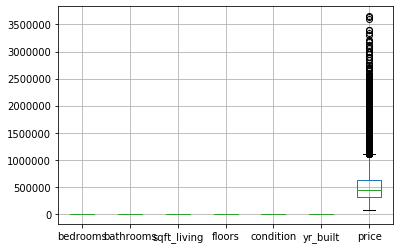

In [25]:
no_outliers_z_df.boxplot()

In [26]:
no_outliers_z_df.shape

(20166, 7)

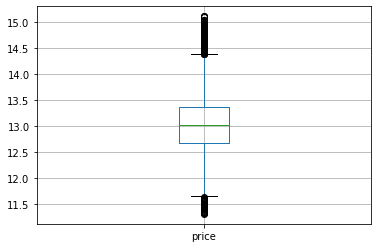

In [28]:
price_df = pd.DataFrame(no_outliers_z_df['price'])
price_df = np.log(price_df)
price_df.boxplot()

In [29]:
price_df = pd.DataFrame(stats.zscore(price_df), columns = price_df.columns)
no_outliers_price_df =  price_df[(np.abs(price_df) <= 2.5).all(axis=1)]

In [30]:
no_outliers_price_df.shape

(19828, 1)

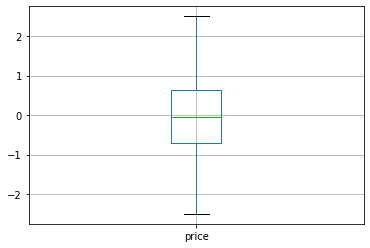

In [31]:
no_outliers_price_df.boxplot()

In [32]:
no_outliers_z_df.shape

(20166, 7)

In [33]:
np.log(no_outliers_z_df['price']).head()

0    12.309982
1    13.195614
2    12.100712
3    13.311329
4    13.142166
Name: price, dtype: float64

In [34]:
no_outliers_z_df.merge(no_outliers_price_df, right_index = True, left_index = True, how = 'right')

,bedrooms,bathrooms,sqft_living,floors,condition,yr_built,price_x,price_y
0,-0.398737,-1.447464,-1.123042,-0.915427,-0.629187,-0.544898,221900.0,-1.425685
1,-0.398737,0.175607,0.709342,0.936506,-0.629187,-0.681079,538000.0,0.325525
2,-1.473959,-1.447464,-2.127944,-0.915427,-0.629187,-1.293892,180000.0,-1.839487
3,0.676485,1.149449,0.071481,-0.915427,2.444294,-0.204446,604000.0,0.554336
4,-0.398737,-0.149007,-0.291399,-0.915427,-0.629187,0.544548,510000.0,0.219839
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.131469
6,-0.398737,0.175607,-0.242860,0.936506,-0.629187,0.816910,257500.0,-0.883864
7,-0.398737,-0.798235,-1.375505,-0.915427,-0.629187,-0.272536,291850.0,-1.359095
8,-0.398737,-1.447464,-0.155288,-0.915427,-0.629187,-0.374672,229500.0,-0.683335
9,-0.398737,0.500221,-0.014131,0.936506,-0.629187,1.089271,323000.0,0.737135


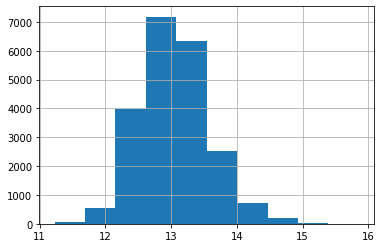

In [35]:
np.log(df["price"]).hist()

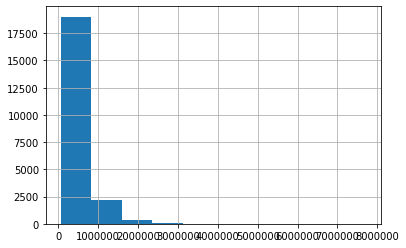

In [76]:
(df['price']).hist()

In [36]:
df.shape

(21613, 11)

In [37]:
X =  no_outliers_z_df[['bedrooms', 'bathrooms', 'sqft_living',
       'floors', 'condition', 'yr_built' ]]

y = no_outliers_z_df['price']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2)

In [39]:
#make sure that rows that have NANs are the rows that were dropped from the features dataset which had outliers

#take training data and fit the model to it
#use that fitted model to predict training y values
#calc train MSE by using predicted training y values and actual y values

#use that fitted model to predict test y values
#calc test MSE by using predicted test y values and actual test y values
X_inter = sm.add_constant(X)
model = sm.OLS(y, X_inter).fit()
model.summary()

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     2643.
Date:                Sat, 06 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:14:47   Log-Likelihood:            -2.7800e+05
No. Observations:               20166   AIC:                         5.560e+05
Df Residuals:                   20159   BIC:                         5.561e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.268e+05   1666.641    316.106      0.000    5.24e+05     5.3e+05
bedrooms    -5.682e+04   2480.118    -22.908      0.000   -6.17e+04    -5.2e+04
bathrooms    6.916e+04   3156.498     21.912      0.000     6.3e+04    7.54e+04
sqft_living  2.098e+05   2972.231     70.573      0.000    2.04e+05    2.16e+05
floors       2.631e+04   2325.697     11.312      0.000    2.17e+04    3.09e+04
condition    8100.5857   1807.803      4.481      0.000    4557.144    1.16e+04
yr_built    -9.708e+04   2168.308    -44.770      0.000   -1.01e+05   -9.28e+04
==============================================================================
Omnibus:                    11719.779   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           202821.781
Skew:                           2.453   Prob(JB):                         0.00
Kurtosis:                      17.742   Cond. No.                         3.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16132, 6) (16132,)
(4034, 6) (4034,)


In [41]:
lm = linear_model.LinearRegression()

In [42]:
model = lm.fit(X_train, y_train)
y_hat_test = lm.predict(X_test)
y_hat_train = lm.predict(X_train)

In [43]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
train_mse =  mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test )

In [45]:
test_mse

55064077327.58569

In [46]:
train_mse

55165886350.51489

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
np.mean(cross_val_score(lm, X, y, cv = 5))

0.43744907139917866

In [49]:
np.mean(cross_val_score(lm, X, y, cv = 10))

0.4368677522868527

In [50]:
np.mean(cross_val_score(lm, X, y, cv = 15))

0.43692830530219245

In [51]:
cross_val_score(lm, X, y, cv = 5)

array([0.45250556, 0.42626249, 0.44506951, 0.44167948, 0.42172831])

In [52]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
0,7129300520,221900,3,1.00,7.073270,5650,1.0,3,7,1955,98178
1,6414100192,538000,3,2.25,7.851661,7242,2.0,3,7,1951,98125
2,5631500400,180000,2,1.00,6.646391,10000,1.0,3,6,1933,98028
3,2487200875,604000,4,3.00,7.580700,5000,1.0,5,7,1965,98136
4,1954400510,510000,3,2.00,7.426549,8080,1.0,3,8,1987,98074


In [53]:
df.duplicated().sum()

3

In [54]:
df.drop_duplicates(inplace = True)

In [55]:
df.duplicated().sum()

0

In [56]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
count,2.161000e+04,2.161000e+04,21610.000000,21610.000000,21610.000000,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000
mean,4.580161e+09,5.400849e+05,3.370847,2.114739,7.550314,1.510829e+04,1.494239,3.409440,7.656779,1971.003609,98077.945673
std,2.876547e+09,3.671525e+05,0.930110,0.770204,0.424831,4.142323e+04,0.539994,0.650764,1.175500,29.372639,53.505373
min,1.000102e+06,7.500000e+04,0.000000,0.000000,5.669881,5.200000e+02,1.000000,1.000000,1.000000,1900.000000,98001.000000
25%,2.123049e+09,3.216125e+05,3.000000,1.750000,7.262278,5.040000e+03,1.000000,3.000000,7.000000,1951.000000,98033.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,7.554859,7.619000e+03,1.500000,3.000000,7.000000,1975.000000,98065.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,7.843849,1.068875e+04,2.000000,4.000000,8.000000,1997.000000,98118.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,9.513404,1.651359e+06,3.500000,5.000000,13.000000,2015.000000,98199.000000


In [57]:
#scaled_df[scaled_df[]]

In [58]:
from sklearn import preprocessing

In [59]:
from scipy import stats

In [60]:
names = df.columns

In [61]:
z_df = stats.zscore(df)
z_df = pd.DataFrame(z_df, columns = df.columns)

In [62]:
scaler = preprocessing.StandardScaler()

scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns = names)

In [63]:
z_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
0,0.886201,-0.866649,-0.398722,-1.447363,-1.122929,-0.228338,-0.915289,-0.629183,-0.558736,-0.544860,1.870030
1,0.637564,-0.005679,-0.398722,0.175622,0.709350,-0.189905,0.936628,-0.629183,-0.558736,-0.681044,0.879452
2,0.365495,-0.980773,-1.473889,-1.447363,-2.127773,-0.123322,-0.915289,-0.629183,-1.409458,-1.293874,-0.933492
3,-0.727611,0.174087,0.676445,1.149413,0.071525,-0.244030,-0.915289,2.444199,-0.558736,-0.204399,1.085044
4,-0.912838,-0.081943,-0.398722,-0.148975,-0.291334,-0.169674,-0.915289,-0.629183,0.291985,0.544614,-0.073745


In [64]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
0,7129300520,221900,3,1.00,7.073270,5650,1.0,3,7,1955,98178
1,6414100192,538000,3,2.25,7.851661,7242,2.0,3,7,1951,98125
2,5631500400,180000,2,1.00,6.646391,10000,1.0,3,6,1933,98028
3,2487200875,604000,4,3.00,7.580700,5000,1.0,5,7,1965,98136
4,1954400510,510000,3,2.00,7.426549,8080,1.0,3,8,1987,98074


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


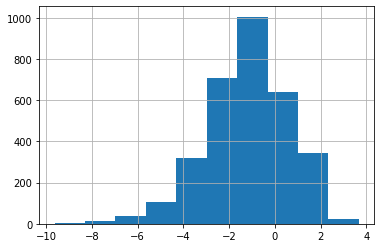

In [65]:
np.log(scaled_df['sqft_lot']).hist()

In [66]:
scaled_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
0,0.886201,-0.866649,-0.398722,-1.447363,-1.122929,-0.228338,-0.915289,-0.629183,-0.558736,-0.544860,1.870030
1,0.637564,-0.005679,-0.398722,0.175622,0.709350,-0.189905,0.936628,-0.629183,-0.558736,-0.681044,0.879452
2,0.365495,-0.980773,-1.473889,-1.447363,-2.127773,-0.123322,-0.915289,-0.629183,-1.409458,-1.293874,-0.933492
3,-0.727611,0.174087,0.676445,1.149413,0.071525,-0.244030,-0.915289,2.444199,-0.558736,-0.204399,1.085044
4,-0.912838,-0.081943,-0.398722,-0.148975,-0.291334,-0.169674,-0.915289,-0.629183,0.291985,0.544614,-0.073745


In [67]:
scaled_df.shape

(21610, 11)

In [68]:
scaled_df['sqft_lot'].value_counts()

-0.244030     358
-0.219889     290
-0.268172     251
-0.190919     220
-0.248859     120
-0.183676     119
-0.256101     114
-0.161949     111
-0.132979     109
-0.277829     103
-0.147464      93
-0.292314      84
-0.241616      78
-0.171606      76
-0.195747      76
-0.231960      73
-0.169191      72
-0.176434      69
-0.266241      67
-0.178848      66
-0.239202      64
-0.187298      64
-0.225924      61
-0.258515      56
-0.234374      54
-0.205404      52
-0.213853      50
-0.263344      49
-0.182228      48
-0.123322      46
             ... 
-0.325122       1
 0.151288       1
 4.192231       1
-0.297528       1
 0.091369       1
-0.142491       1
-0.129937       1
 0.174102       1
 0.021431       1
 0.030218       1
 0.485481       1
-0.009326       1
-0.283260       1
-0.180296       1
-0.313027       1
-0.154513       1
 0.065972       1
 5.965939       1
 0.285709       1
-0.206176       1
 0.038354       1
 0.060685       1
 27.755257      1
-0.184594       1
-0.119749 

Text(0.5, 1.0, 'Features')

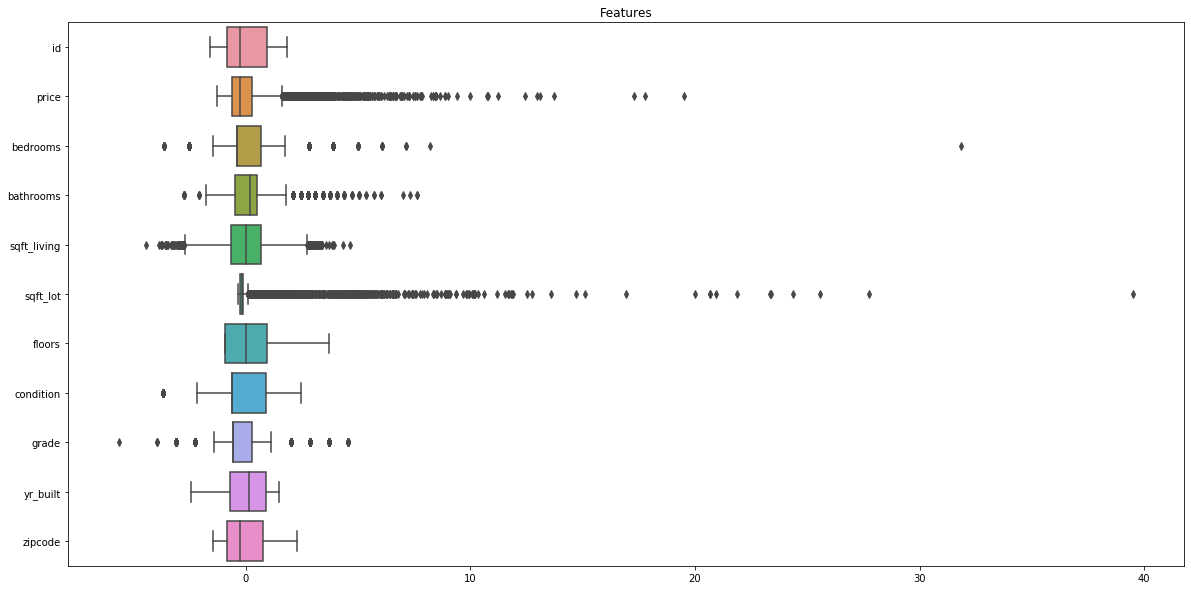

In [77]:
plt.figure(figsize=(20,10))
sns.boxplot(data =scaled_df,orient = 'h')
plt.title('Features')

In [70]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
0,7129300520,221900,3,1.00,7.073270,5650,1.0,3,7,1955,98178
1,6414100192,538000,3,2.25,7.851661,7242,2.0,3,7,1951,98125
2,5631500400,180000,2,1.00,6.646391,10000,1.0,3,6,1933,98028
3,2487200875,604000,4,3.00,7.580700,5000,1.0,5,7,1965,98136
4,1954400510,510000,3,2.00,7.426549,8080,1.0,3,8,1987,98074


In [71]:
df['sqft_lot'].describe()

count    2.161000e+04
mean     1.510829e+04
std      4.142323e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.619000e+03
75%      1.068875e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

In [72]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
0,7129300520,221900,3,1.00,7.073270,5650,1.0,3,7,1955,98178
1,6414100192,538000,3,2.25,7.851661,7242,2.0,3,7,1951,98125
2,5631500400,180000,2,1.00,6.646391,10000,1.0,3,6,1933,98028
3,2487200875,604000,4,3.00,7.580700,5000,1.0,5,7,1965,98136
4,1954400510,510000,3,2.00,7.426549,8080,1.0,3,8,1987,98074


In [80]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
count,2.161000e+04,2.161000e+04,21610.000000,21610.000000,21610.000000,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000
mean,4.580161e+09,5.400849e+05,3.370847,2.114739,7.550314,1.510829e+04,1.494239,3.409440,7.656779,1971.003609,98077.945673
std,2.876547e+09,3.671525e+05,0.930110,0.770204,0.424831,4.142323e+04,0.539994,0.650764,1.175500,29.372639,53.505373
min,1.000102e+06,7.500000e+04,0.000000,0.000000,5.669881,5.200000e+02,1.000000,1.000000,1.000000,1900.000000,98001.000000
25%,2.123049e+09,3.216125e+05,3.000000,1.750000,7.262278,5.040000e+03,1.000000,3.000000,7.000000,1951.000000,98033.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,7.554859,7.619000e+03,1.500000,3.000000,7.000000,1975.000000,98065.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,7.843849,1.068875e+04,2.000000,4.000000,8.000000,1997.000000,98118.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,9.513404,1.651359e+06,3.500000,5.000000,13.000000,2015.000000,98199.000000


In [82]:
df.shape

(21610, 11)

In [96]:
smaller_df = df[df['price']<=800000]

In [97]:
smaller_df.shape

(18665, 11)

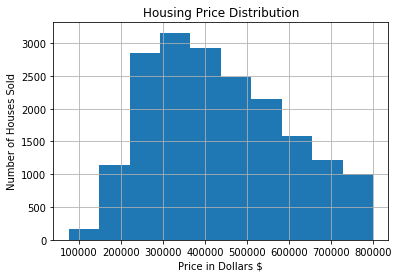

In [105]:
smaller_df['price'].hist()
plt.title("Housing Price Distribution");
plt.xlabel('Price in Dollars $');
plt.ylabel('Number of Houses Sold');

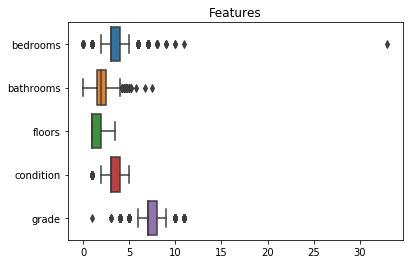

In [114]:
sns.boxplot(data =smaller_df.drop(['id','sqft_lot','price','zipcode','yr_built','sqft_living'],axis=1),orient = 'h')
plt.title('Features');